In [1]:
# %matplotlib notebook

# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_csv_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
combined_csv_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice using  length of .unique to get just the number.
total_mice = len(combined_csv_df["Mouse ID"].unique())
total_mice

249

In [4]:
#using .value_counts() will come out with the same number after showing the count for each mouse ID.  
#they both work to get the number of unique Mouse IDs
total_mice_vc = combined_csv_df["Mouse ID"].value_counts()
total_mice_vc

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
#trying something found online 
#@ https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
print(combined_csv_df.duplicated().sum())
located_dups = combined_csv_df.loc[combined_csv_df.duplicated(),:]
located_dups

1


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# requested help from AskBCS for this line of code...
dupe_mouse = combined_csv_df.loc[combined_csv_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupe_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_finder = combined_csv_df["Mouse ID"].isin(dupe_mouse)
combined_csv_df[dupe_finder]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combined_csv_df[~dupe_finder]
cleaned_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(cleaned_mouse_df["Mouse ID"].unique())
total_mice

248

## Summary Statistics

In [10]:
cleaned_mouse_df['Tumor Volume (mm3)'].describe()
#cleaned_mouse_df.describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [11]:
mean_tumor = cleaned_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = cleaned_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = cleaned_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_tumor = cleaned_mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = cleaned_mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_9076\464773071.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor = cleaned_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_9076\464773071.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor = cleaned_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_9076\464773071.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will 

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame(
                    {"Mean Tumor Volume": mean_tumor,
                     "Median Tumor Volume": median_tumor,     
                     "Tumor Volume Variance": var_tumor,
                     "Tumor Volume Std. Dev.": stddev_tumor,
                     "Tumor Volume Std. Err.": sem_tumor})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

cleaned_mouse_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var','std','sem'])["Tumor Volume (mm3)"]

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_9076\1185793320.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cleaned_mouse_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
#This didn't work...
#compare_drugs = cleaned_mouse_df[["Drug Regimen", "Timepoint"]]
#compare_drugs = compare_drugs.set_index("Drug Regimen")
#compare_drugs

In [15]:
total_time = cleaned_mouse_df.groupby(["Drug Regimen"])["Timepoint"].count()
total_time

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [16]:
drug_count_summary = pd.DataFrame(
                        {"total count": total_time,
                        })
drug_count_summary = drug_count_summary.sort_values(["total count"], ascending=False)
drug_count_summary

,total count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

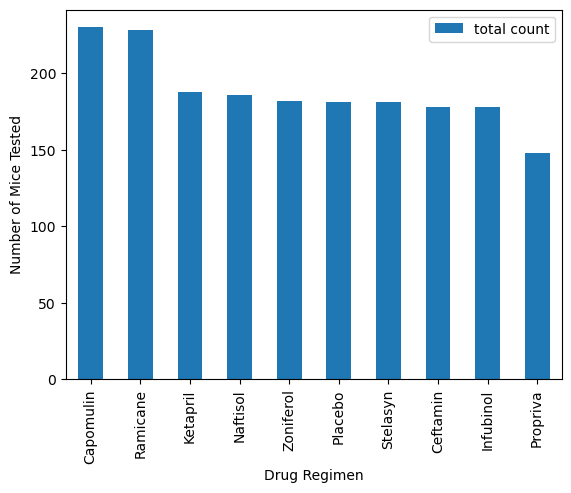

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count_summary.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested")

In [18]:
drug_count_summary.reset_index(inplace=True)
drug_count_summary

,Drug Regimen,total count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_count_summary))
tick_locations = [value for value in x_axis]

[]

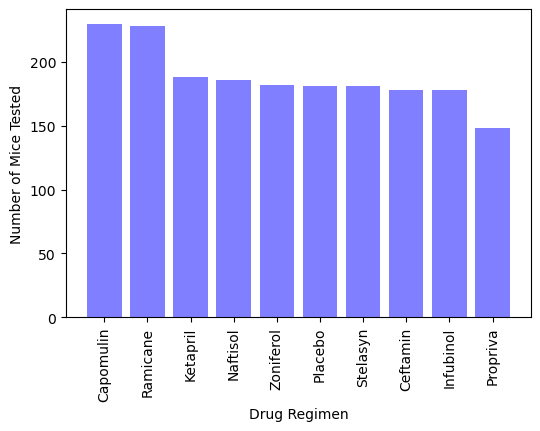

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(6,4))
plt.bar(x_axis, drug_count_summary["total count"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_count_summary["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.plot()

In [21]:
mouse_sexs = cleaned_mouse_df.groupby(["Sex"])["Sex"].count()
mouse_sexs

Sex
Female    922
Male      958
Name: Sex, dtype: int64

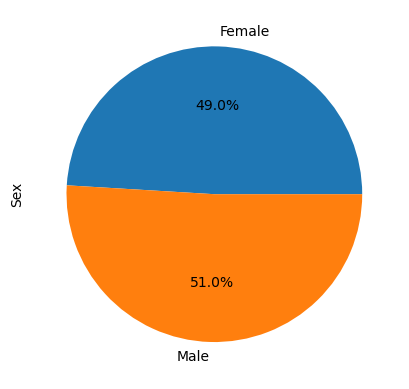

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sexs_pie = mouse_sexs.plot(kind='pie',autopct="%1.1f%%")

# Set the xlabel and ylabel using class methods
#mouse_sexs_pie.set_title("Male")
#mouse_sexs_pie.set_ylabel("Female")

#plt.show()


In [23]:
mouse_sexs.index

Index(['Female', 'Male'], dtype='object', name='Sex')

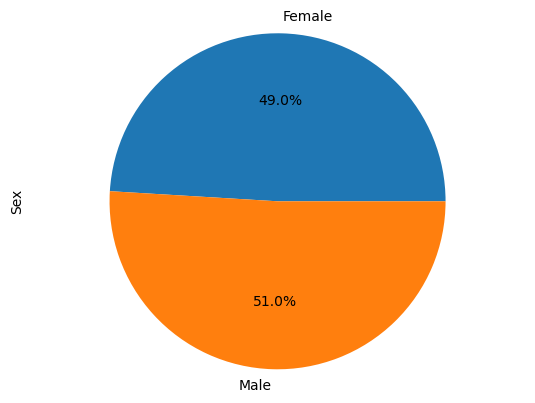

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sexs, labels=mouse_sexs.index, autopct="%1.1f%%")

plt.ylabel('Sex')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
##using .isin to pull the four Drug Regimens from the original cleaned df
reduced_drugs_df = combined_csv_df[combined_csv_df["Drug Regimen"].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])]
reduced_drugs_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [26]:
##Quickly looking at witch columns are in the new dataframe
reduced_drugs_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [27]:
# Start by getting the last (greatest) timepoint for each mouse
##using .agg and max to get the max of each column based of Mouse ID
reduced_max_values = reduced_drugs_df.groupby(["Mouse ID"]).agg('max')

##reseting the index making Mouse ID a column
reduced_max_values.reset_index(inplace=True)
reduced_max_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,45.466677,1,Ramicane,Male,3,22
4,a444,45,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,45.000000,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,45.000000,0,Ramicane,Male,11,16


In [28]:
##Pulling the desired columns from the above dataframe
reduced_max_timepoint = reduced_max_values[['Mouse ID','Timepoint']]
reduced_max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [30]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Last_timepoint = pd.merge(reduced_max_timepoint, cleaned_mouse_df, on=["Mouse ID", "Timepoint"], how="left")
Last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [31]:
# Got assistance with AskBCS on this portion
# Put treatments into a list for for loop (and later for plot label
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = Last_timepoint.loc[Last_timepoint["Drug Regimen"] == x,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)] 
    print(f"{x}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [32]:
tumor_vol

[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

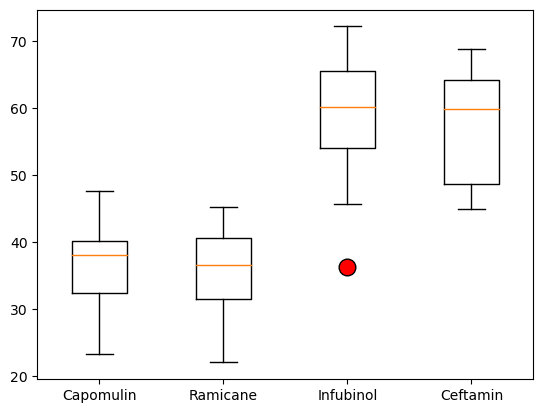

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(tumor_vol, flierprops=flierprops)
ax.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [34]:
one_mouse_df = combined_csv_df[combined_csv_df["Mouse ID"].isin(['b128'])]
one_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_time_df = one_mouse_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
mouse_time_df
mouse_time_df.set_index(['Mouse ID'])

,Timepoint,Tumor Volume (mm3)
Mouse ID,,
b128,0,45.000000
b128,5,45.651331
b128,10,43.270852
b128,15,43.784893
b128,20,42.731552
b128,25,43.262145
b128,30,40.605335
b128,35,37.967644
b128,40,38.379726


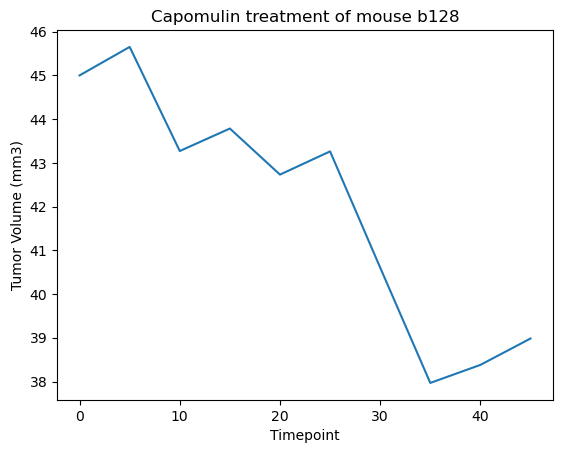

In [36]:
mouse_time_df.plot.line(x="Timepoint", y="Tumor Volume (mm3)", title = "Capomulin treatment of mouse b128",
                       ylabel="Tumor Volume (mm3)", legend=False)
plt.show()

In [37]:
capomulin_mice = reduced_drugs_df.loc[reduced_drugs_df["Drug Regimen"] == 'Capomulin']
capomulin_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [38]:
mean_reduced_tumor = capomulin_mice.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
mean_reduced_tumor

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [39]:
capomulin_one_mouse = capomulin_mice.drop_duplicates('Mouse ID')
capomulin_one_mouse_df = pd.merge(capomulin_one_mouse, mean_reduced_tumor, on=["Mouse ID"], how="left").dropna()
capomulin_one_mouse_df.rename(columns = {'Tumor Volume (mm3)_y':'Average Tumor Volume (mm3)',
                                         'Tumor Volume (mm3)_x':'Tumor Volume (mm3)'}, inplace = True)
capomulin_one_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Average Tumor Volume (mm3)
0,b128,0,45.0,0,Capomulin,Female,9,22,41.963636
1,j246,0,45.0,0,Capomulin,Female,21,21,43.216925
2,r554,0,45.0,0,Capomulin,Female,8,17,36.509212
3,s185,0,45.0,0,Capomulin,Female,3,17,34.559143
4,b742,0,45.0,0,Capomulin,Male,7,21,40.083699
5,x401,0,45.0,0,Capomulin,Female,16,15,36.182040
6,l509,0,45.0,0,Capomulin,Male,17,21,44.434474
7,s710,0,45.0,0,Capomulin,Female,1,23,42.803733
8,r157,0,45.0,0,Capomulin,Male,22,25,45.798970
9,u364,0,45.0,0,Capomulin,Male,18,17,39.887495


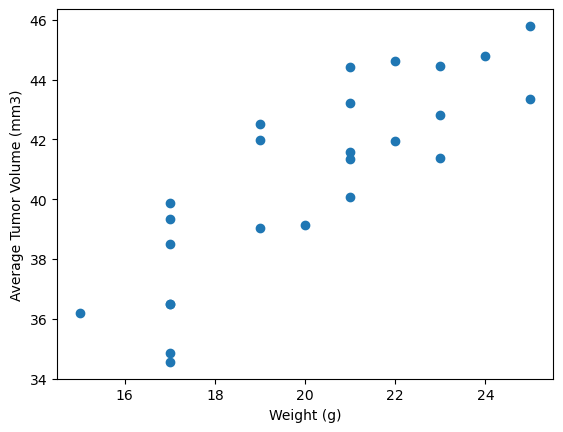

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = capomulin_one_mouse_df["Weight (g)"].astype("float")
y_values = capomulin_one_mouse_df["Average Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


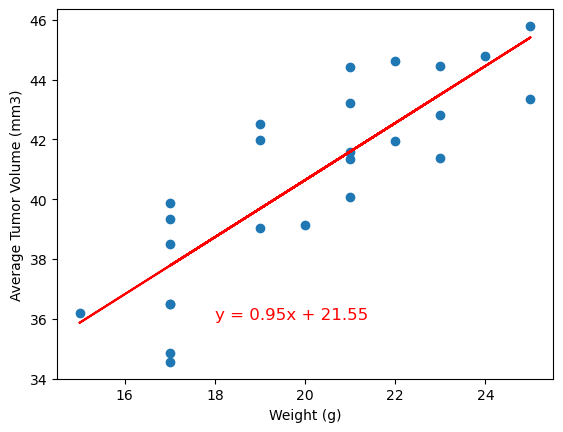

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=12,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Print r square value
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2,2)}")

# Show plot
plt.show()